In [1]:
from functions_calc import *
from functions_misc import *
from functions_beamline import *
stdout = sys.stdout

In [2]:
# simulation parameters
from params_simulation import *

aperture_size = 1.0    # +- nxFWHM aperture size for telescope mirror 1

dir_plot = dir_case + '{}%_beamsize_{}%_mirror_aperture/'.format(round(100/nFWHM,2), round(100*aperture_size,2)); make_dir(dir_plot)
print('\nCWD:', dir_plot)


path exists
path exists
path exists

CWD: output/9000eV_2DCM_111-9.0_440-38.3_20.0mm/100.0%_beamsize_100.0%_mirror_aperture/


In [3]:
# crystal dimension calculation
beam_size, l_crystal, w_crystal = calc_crystal_dimension(E0, z_s=z_source, m_alpha=m_alpha, m2_z=m2_z,
                                              m1_p=m1_p, m1_q=m1_q, m2_p=m2_p,
                                              aperture_size=aperture_size,
                                             
                                              HHLM_type=HHLM_type,
                                              HHLM_offset=HHLM_offset,
                                              pair_distance=pair_distance,
                                              hkl1=hkl1, alphaAsym1=alphaAsym1,
                                              hkl2=hkl2, alphaAsym2=alphaAsym2,
                                              
                                              f1=f1, f2=f2,
                                              hkl3=hkl3, alphaAsym3=alphaAsym3,
                                              beam_params=beam_params,
                                              crystals=crystals,
                                              nFWHMx=nFWHMx, nFWHMy=nFWHMy,
                                              stdout=sys.stdout)

# slit width calculation
slit_width = calc_slit_width(beam_size[5]*2, 1239.84193e-9/E0, f2, min_width=3e-6)

g:\my drive\slac\slac-diling\11. 21 winter\dxs_optics\lcls\lcls_beamline_toolbox-integration\lcls_beamline_toolbox\xraybeamline2d\optics1d.py:2446: RuntimeWarning: divide by zero encountered in double_scalars
  R = 1 / (2 * second_order*1e-9)


Bragg angle: [12.696 12.691 45.849 45.847 45.847 45.847]
asymmetry: [ -9.    9.  -38.3  38.3   0.   15. ]
beam FWHM: [ 7.614  1.329 10.06   1.331  1.331  0.781] mm
footprint x: [123.605 123.603  60.676  60.676  11.132   9.143] mm
footprint y: [1.373 1.373 1.374 1.374 1.395 1.396] mm
position: [955.      955.04214 955.24214 955.24154 960.      959.99941] m

calculated slit width too narrow (0.82 um)
actual slit width: 3.0 um



In [4]:
%%capture capt

# beam profile simulation
n_loop = 31

devices, mono_beamline_perfect = define_beamline_normal(
                        E0, z_s=z_source, m_alpha=m_alpha, m2_z=m2_z,
                        m1_p=m1_p, m1_q=m1_q, m2_p=m2_p_perfect,
                        aperture_size=aperture_size,

                        HHLM_type=HHLM_type,
                        HHLM_offset=HHLM_offset,
                        pair_distance=pair_distance,
                        hkl1=hkl1, alphaAsym1=alphaAsym1,
                        hkl2=hkl2, alphaAsym2=alphaAsym2,
                        l_crystal=l_crystal,
                        w_crystal=w_crystal,

                        f1=f1, f2=f2, slit_width=slit_width,
                        hkl3=hkl3, alphaAsym3=alphaAsym3,
                        shapeErrors=[None for i in range(6)],

                        FOV1=FOV1, N1=N1,
                        FOV2=FOV2, N2=N2,
                        plate_position=plate_position)

screen_names = ['im_input', 'im_after_T1', 'im_after_T2', 'im_after_HHLM1', 'im_after_HHLM2', 'im_after_HHLM3', 'im_after_HHLM4',
    'im_after_C1','im_after_C2','im_before_MIR1','im_after_MIR1','im_focus','im_before_MIR2','im_after_MIR2','im_after_C3','im_output']

beam_params['photonEnergy'] = E0
pulse = beam.Pulse(beam_params=beam_params, unit_spectrum=True, spectral_width=E0*1e-3, N=100)
pulse.propagate(beamline=mono_beamline_perfect, screen_names=screen_names)

winsound.Beep(1500, 1000)


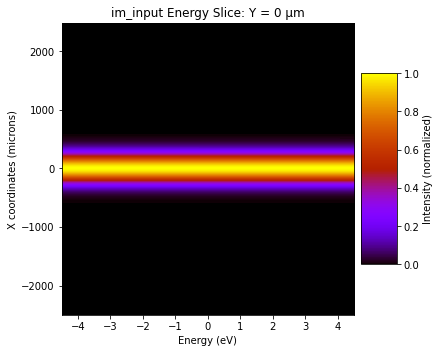

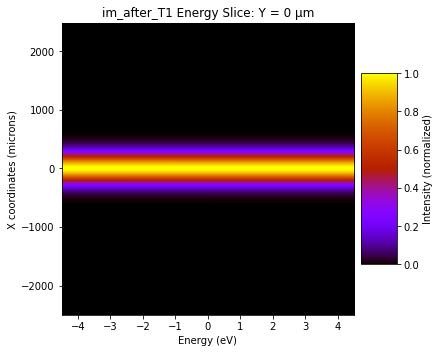

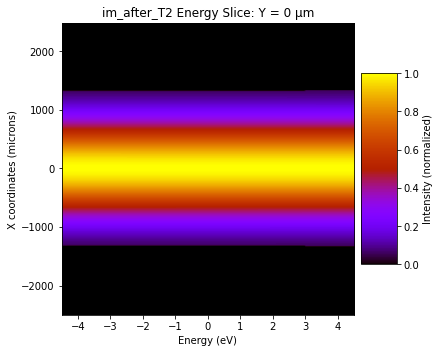

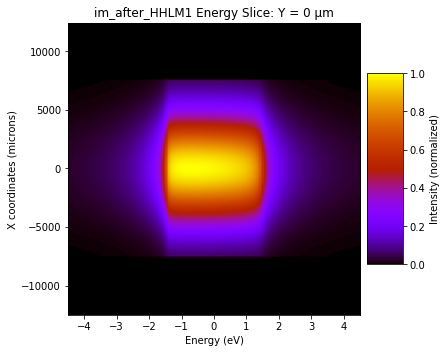

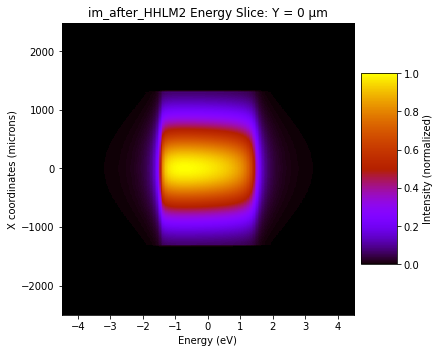

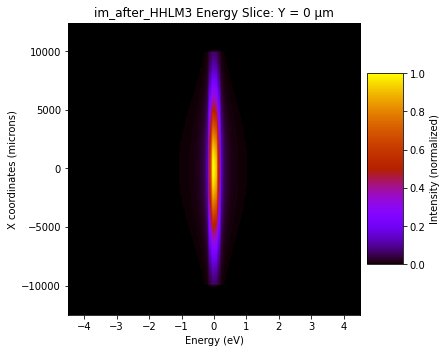

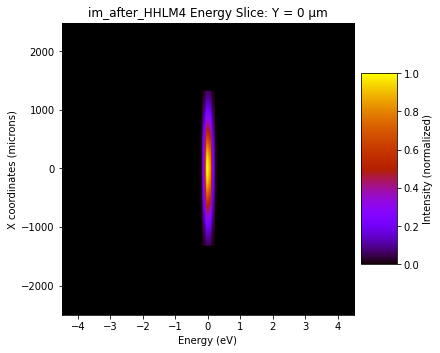

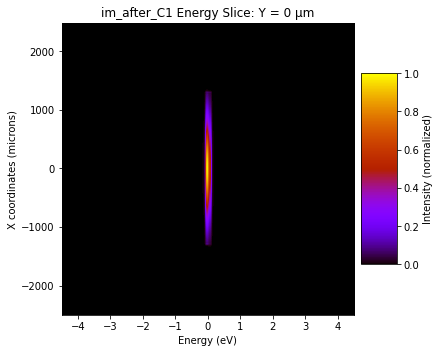

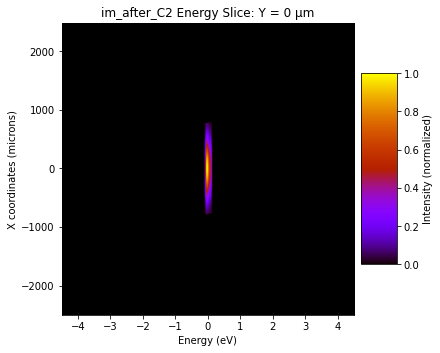

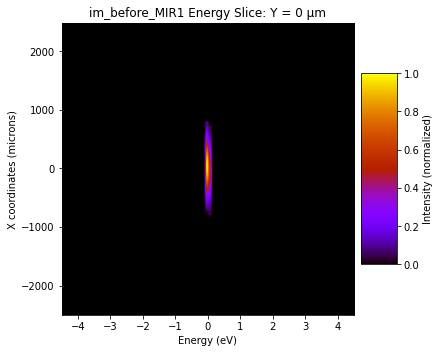

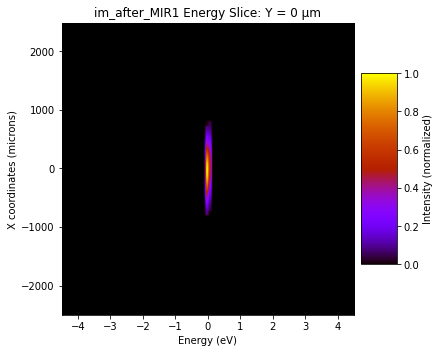

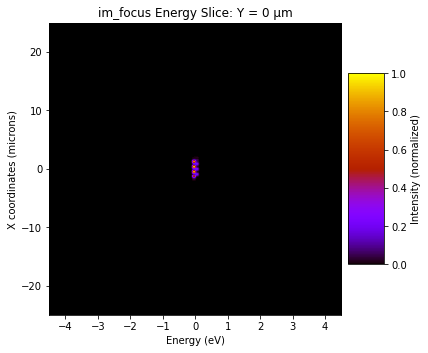

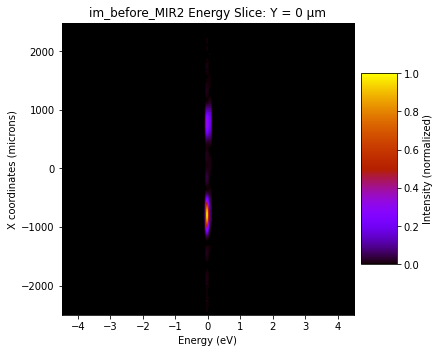

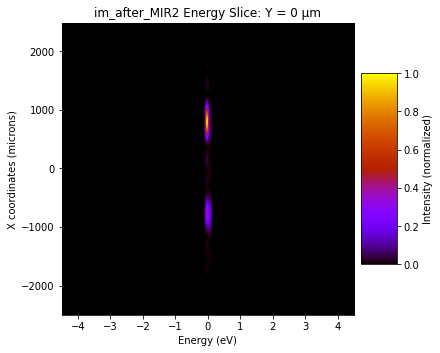

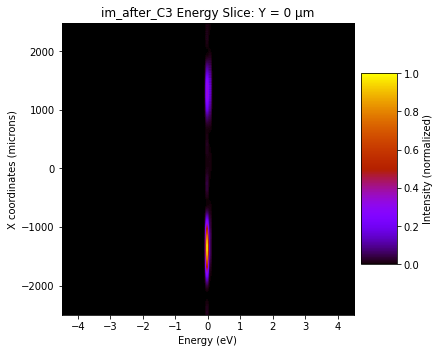

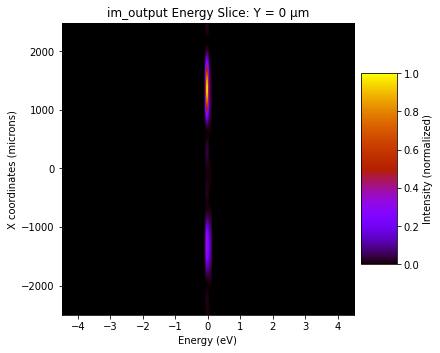

In [5]:
''' energy slices '''
for i,screen_name in enumerate(pulse.screens):
    try:
        pulse.imshow_energy_slice(screen_name)
    except:
        print(screen_name, 'failed')

In [21]:
# crystal bandwidths
power_in = [50*0.95**2]
bandwidth = [E0/1e3]
power = []

for i,crystal in enumerate(crystals):
    screen_name = 'im_after_{}'.format(crystal)
    bandwidth_in = bandwidth[i]
    bandwidth_out = np.min([bandwidth_in, pulse.pulse_bandwidth(screen_name)])
    bandwidth.append(bandwidth_out)
    power_in.append(bandwidth_out/bandwidth_in * power_in[i]*0.95)
    power.append(power_in[i]-power_in[i+1])
    
    print(crystal, '{}eV, {}W'.format(round(bandwidth_out,4), round(power[i],4)))


HHLM1 3.2042eV, 29.8626W
HHLM2 3.2042eV, 0.7631W
HHLM3 0.2785eV, 13.3021W
HHLM4 0.2133eV, 0.3261W
C1 0.2016eV, 0.0889W
C2 0.1987eV, 0.05W


In [ ]:
winsound.Beep(1500, 1000)